# Homework 2

##Часть 1
Решите пожалуйста следующую задачу.
1.   Рассчитайте метрики TF-IDF для любых 3 песен на одном языке, которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать
стоп-слова.
2.   Сравните его с другим методам векторизации текста, например, с Count Vectorizer,
Word2Vec или Doc2Vec. Необходимо сделать вывод приносит ли TF-IDF улучшения по
сравнению с альтернативными подходами, с точки зрения вычислительной
эффективности и масштабируемости алгоритма при обработке больших объемов
данных разных данных.
3. Сделайте исследование по полученнм преобразованным данным.
Какие слова/слово сочения чаще всего встречаются, а какие реже.


##Часть 2
Решите пожалуйста следующую задачу.
Данные IMDB Dataset.csv - Google Диск
Цель этого задания - использовать предварительно обученную модель BERT для
классификации тональности отзывов на фильмы.
1. Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную
метку тональности (положительный/отрицательный).
2. Используйте библиотеку Hugging Face для загрузки предварительно обученной
модели BERT и токенизатора.
3. Подготовьте данные: используйте токенизатор BERT для преобразования текстовых
данных в формат, который можно подать на вход модели BERT.
4. Создайте классификатор на основе BERT: это может быть модель BERT с одним
линейным слоем для классификации на вершине.
5. Обучите классификатор на данных обучения и оцените его производительность на
данных для тестирования. Удачи

In [ ]:
import pandas as pd
import numpy as np

## Часть 1

Решите пожалуйста следующую задачу.

1.   Рассчитайте метрики TF-IDF для любых 3 песен на одном языке, которые вы сами выберите. Не забудьте, что нужно привести слова к начальной форме, убрать
стоп-слова.
2.   Сравните его с другим методам векторизации текста, например, с Count Vectorizer,
Word2Vec или Doc2Vec. Необходимо сделать вывод приносит ли TF-IDF улучшения по
сравнению с альтернативными подходами, с точки зрения вычислительной
эффективности и масштабируемости алгоритма при обработке больших объемов
данных разных данных.
3. Сделайте исследование по полученнм преобразованным данным.
Какие слова/слово сочения чаще всего встречаются, а какие реже.


### Добавим тексты песен на английском языке

Первая песня: Sabaton - The Art Of War

In [ ]:
song_1 = '''
I stand alone
And gaze upon the battlefield
Wasteland
Is all that's left after the fight
And now I'm searching a new way to defeat my enemy
Bloodshed
I've seen enough of death and pain

I will run – they will hunt me in vain
I will hide – they'll be searching
I'll regroup – feign retreat they'll pursue
Coup de grace I will win but never fight [mercy killing]
That's the Art of War!

Breaking the will to fight among the enemy
Force them to hunt me
They will play my game
And play by my rules
I will be close but still untouchable
No more will I see suffering and pain

They will find me no more I'll be gone
I will have them surrounded
They will yield without fight overrun
Coup de grace I will win but never fight
That's the Art of War

Broken and lost
Tired of war
They'll surrender to me
Caught in my trap
There's no way out
Fail never again
'''

Вторая песня: Iron Maiden - Fear of the dark

In [ ]:
song_2 = '''
I am a man who walks alone
And when I'm walking a dark road
At night or strolling through the park
When the light begins to change
I sometimes feel a little strange
A little anxious when it's dark
Fear of the dark
Fear of the dark
I have a constant fear that something's always near
Fear of the dark
Fear of the dark
I have a phobia that someone's always there
Have you run your fingers down the wall
And have you felt your neck skin crawl
When you're searching for the light?
Sometimes when you're scared to take a look
At the corner of the room
You've sensed that something's watching you
Fear of the dark
Fear of the dark
I have a constant fear that something's always near
Fear of the dark
Fear of the dark
Have a phobia that someone's always there
Have you ever been alone at night
Thought you heard footsteps behind
And turned around and no one's there?
And as you quicken up your pace
You find it hard to look again
Because you're sure there's someone there
'''

Третья песня: Lana Del Rey - Young and Beautiful

In [ ]:
song_3 = '''
I've seen the world, done it all, had my cake now
Diamonds, brilliant, and Bel Air now
Hot summer nights, mid-July
When you and I were forever wild
The crazy days, city lights
The way you'd play with me like a child
Will you still love me when I'm no longer young and beautiful?
Will you still love me when I got nothing but my aching soul?
I know you will, I know you will, I know that you will
Will you still love me when I'm no longer beautiful?
I've seen the world, lit it up as my stage now
Channeling angels in the new age now
Hot summer days, rock and roll
The way you'd play for me at your show
And all the ways I got to know
Your pretty face and electric soul
Will you still love me when I'm no longer young and beautiful?
Will you still love me when I got nothing but my aching soul?
I know you will, I know you will, I know that you will
Will you still love me when I'm no longer beautiful?
Dear Lord, when I get to Heaven
Please let me bring my man
When he comes, tell me that you'll let him in
Father, tell me if you can
All that grace, all that body
All that face makes me wanna party
He's my sun, he makes me shine like diamonds
'''

In [ ]:
songs = [song_1, song_2, song_3]

Загрузим:
1. Стоп-слова — это наиболее распространенные слова в языке, такие как "the", "and", "is", которые обычно удаляются при анализе текста, поскольку они не несут значимой информации.
2. базу данных семантических отношений между английскими словами

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

stop_words= stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Выполним предобразотку текста: приведем к одному регистру, удалим стоп слова, сокращения, переносы строк

In [ ]:
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
processed_lyrics_list = []
punctuation = "!?.)(,-"
for lyrics in songs:
    # Приведение к нижнему регистру
    lyrics = lyrics.lower()

    # Удаление служебных сокращений
    lyrics = re.sub(r"'ve", ' ', lyrics)
    lyrics = re.sub(r"'s", ' ', lyrics)
    lyrics = re.sub(r"'m", ' ', lyrics)
    lyrics = re.sub(r"'d", ' ', lyrics)
    lyrics = re.sub(r"'re", ' ', lyrics)
    lyrics = re.sub(r"'ll", ' ', lyrics)
    lyrics = re.sub(r"'t", ' ', lyrics)

    # Удаление переносов строк и пр.
    lyrics = re.sub(r"\n", ' ', lyrics)

    # Удаляем пунктуацию
    for char in punctuation:
        lyrics = lyrics.replace(char, ' ')

    # Токенизация по пробелам
    tokens = lyrics.split()

    # Лемматизация + удаление стоп-слов
    clean_tokens = []
    for word in tokens:
        w_lem = lemmatizer.lemmatize(word)
        if w_lem not in stop_words and w_lem.strip() != '':
            clean_tokens.append(w_lem)

    # Добавляем в список обработанных текстов
    processed_lyrics_list.append(' '.join(clean_tokens))

print("ПРЕДОБРАБОТАННЫЕ ТЕКСТЫ:\n", processed_lyrics_list, "\n")

ПРЕДОБРАБОТАННЫЕ ТЕКСТЫ:
 ['stand alone gaze upon battlefield wasteland left fight searching new way defeat enemy bloodshed seen enough death pain run – hunt vain hide – searching regroup – feign retreat pursue coup de grace win never fight [mercy killing] art war breaking fight among enemy force hunt play game play rule close still untouchable see suffering pain find gone surrounded yield without fight overrun coup de grace win never fight art war broken lost tired war surrender caught trap way fail never', 'man walk alone walking dark road night strolling park light begin change sometimes feel little strange little anxious dark fear dark fear dark constant fear something always near fear dark fear dark phobia someone always run finger wall felt neck skin crawl searching light sometimes scared take look corner room sensed something watching fear dark fear dark constant fear something always near fear dark fear dark phobia someone always ever alone night thought heard footstep behind t

## Сравнение разных векторизаторов

In [ ]:
!pip install gensim scikit-learn

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

import time

In [ ]:
times = {}
methods = ['CountVectorizer', 'TF-IDF', 'Word2Vec']

### CountVectorizer

In [ ]:
start = time.time()
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(processed_lyrics_list)
end = time.time()
times['CountVectorizer'] = end - start

### TF-IDF

In [ ]:
start = time.time()
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_lyrics_list)
end = time.time()
times['TF-IDF'] = end - start

### Word2Vec
Выбор Word2Vec вместо Doc2Vec обоснован тем, что нам важно именно слово-ориентированное представление (вектор каждого слова), а не общий вектор всего документа. При небольшом количестве песен Word2Vec является более наглядным (и распространённым) примером нейросетевой векторизации лексики.

In [ ]:
start = time.time()
sentences = [txt.split() for txt in processed_lyrics_list]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
end = time.time()
times['Word2Vec'] = end - start

In [ ]:
print("Замеры времени (секунды):")
for m in methods:
    print(f"{m}: {times[m]:.5f} c")

Замеры времени (секунды):
CountVectorizer: 0.00614 c
TF-IDF: 0.00873 c
Word2Vec: 0.03492 c


## Визуализация времени работы

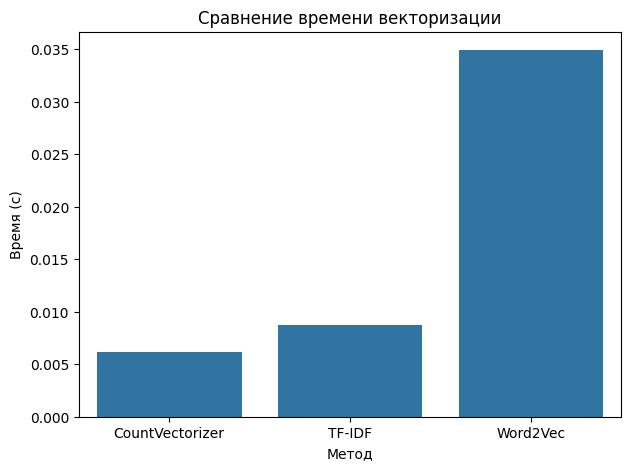

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(x=list(times.keys()), y=list(times.values()))
plt.title('Сравнение времени векторизации')
plt.xlabel('Метод')
plt.ylabel('Время (с)')
plt.show()

По времени видно, что CountVectorizer и TF-IDF работают быстрее на небольших объёмах текста, чем обучение Word2Vec. Ведь Word2Vec — это нейросеть, где идёт итеративный процесс обучения эмбеддингов.

## Краткий анализ результатов

### Частота слов

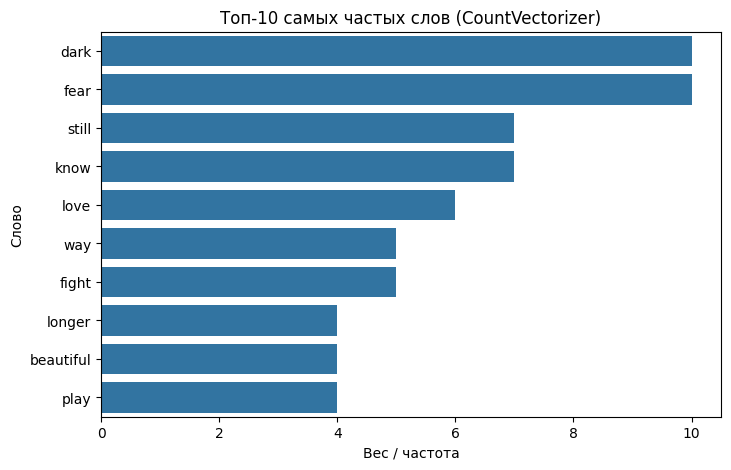

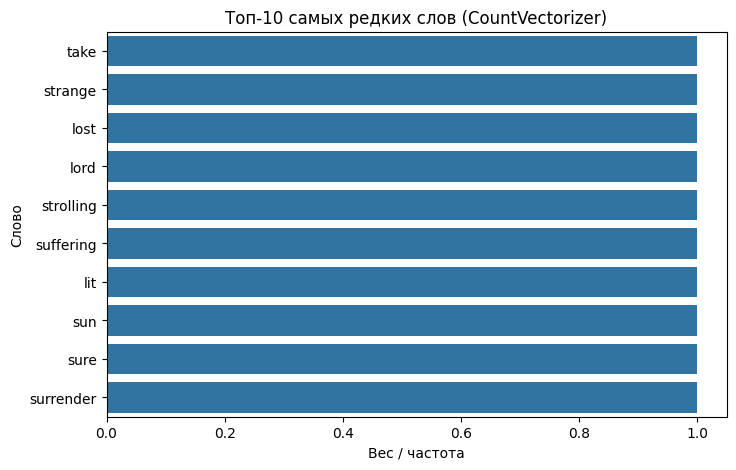

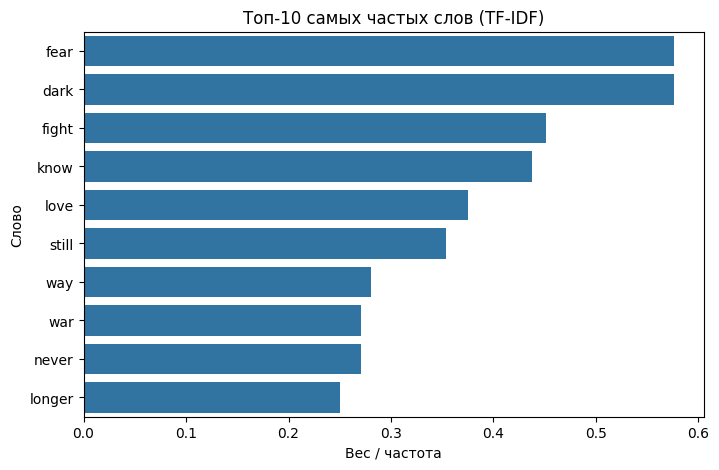

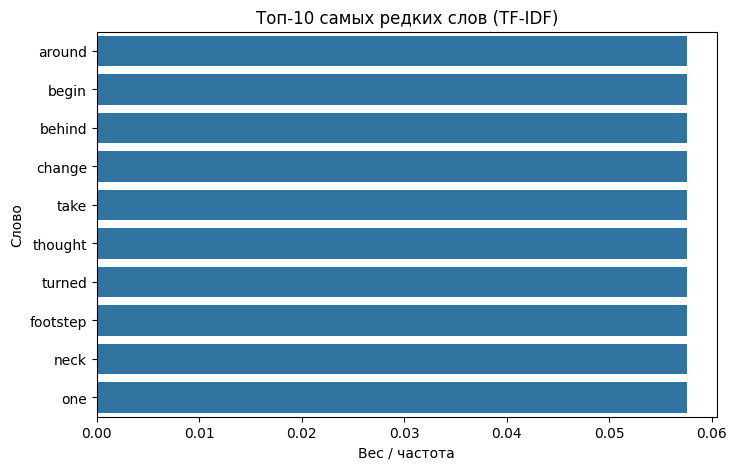

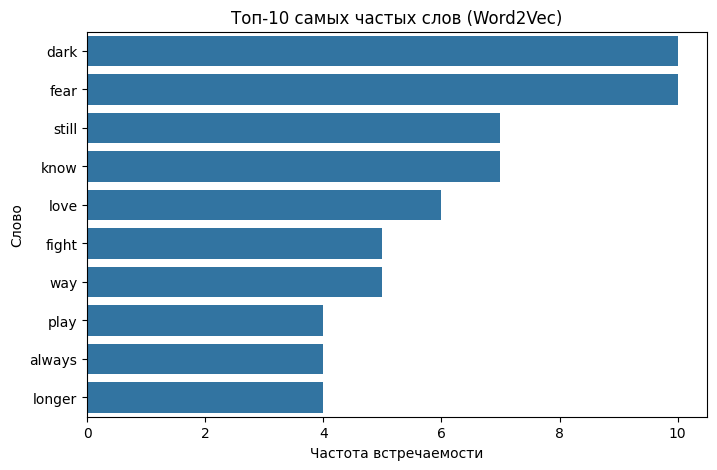

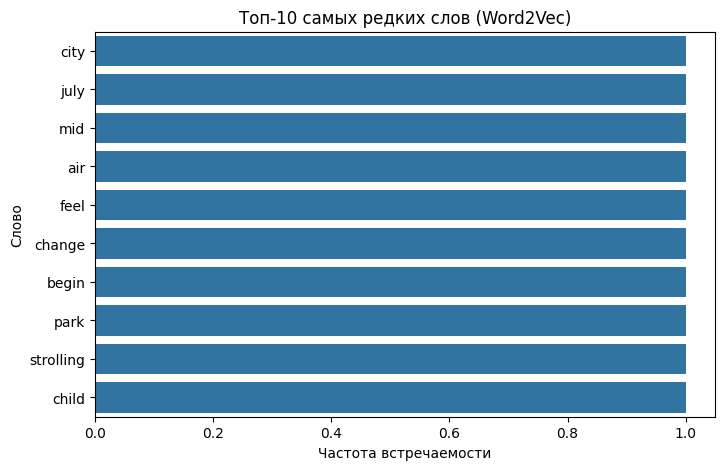

In [ ]:
def plot_top_bottom_words(matrix, feature_names, method_name):
    word_counts = np.asarray(matrix.sum(axis=0)).flatten()
    df = pd.DataFrame({"word": feature_names, "count": word_counts})

    # Выбираем топ-10 самых частых слов
    df_top = df.sort_values("count", ascending=False).head(10)

    # Выбираем топ-10 самых редких слов (исключаем нулевые значения)
    df_bottom = df[df["count"] > 0].sort_values("count", ascending=True).head(10)

    # Построение графика для самых частых слов
    plt.figure(figsize=(8, 5))
    sns.barplot(y="word", x="count", data=df_top)
    plt.title(f"Топ-10 самых частых слов ({method_name})")
    plt.xlabel("Вес / частота")
    plt.ylabel("Слово")
    plt.show()

    # Построение графика для самых редких слов
    plt.figure(figsize=(8, 5))
    sns.barplot(y="word", x="count", data=df_bottom)
    plt.title(f"Топ-10 самых редких слов ({method_name})")
    plt.xlabel("Вес / частота")
    plt.ylabel("Слово")
    plt.show()


plot_top_bottom_words(count_matrix, count_vectorizer.get_feature_names_out(), "CountVectorizer")
plot_top_bottom_words(tfidf_matrix, tfidf_vectorizer.get_feature_names_out(), "TF-IDF")

# Анализ частоты слов в Word2Vec
word_counts_w2v = [(word, w2v_model.wv.get_vecattr(word, "count")) for word in w2v_model.wv.index_to_key]
df_w2v = pd.DataFrame(word_counts_w2v, columns=["word", "count"])


df_w2v_top = df_w2v.sort_values("count", ascending=False).head(10)
df_w2v_bottom = df_w2v.sort_values("count", ascending=True).head(10)

# Построение графика для самых частых слов в Word2Vec
plt.figure(figsize=(8, 5))
sns.barplot(y="word", x="count", data=df_w2v_top)
plt.title("Топ-10 самых частых слов (Word2Vec)")
plt.xlabel("Частота встречаемости")
plt.ylabel("Слово")
plt.show()

# Построение графика для самых редких слов в Word2Vec
plt.figure(figsize=(8, 5))
sns.barplot(y="word", x="count", data=df_w2v_bottom)
plt.title("Топ-10 самых редких слов (Word2Vec)")
plt.xlabel("Частота встречаемости")
plt.ylabel("Слово")
plt.show()


## Сравнение частых и редких слов по методам
1. CountVectorizer.
    - Частые слова: "dark", "fear", "still", "know", "love" → это общеупотребительные слова, часто встречающиеся во всех песнях.
    - Редкие слова: "force", "lord", "yield", "surrender" → встречаются только в одной песне.
2. TF-IDF.
    - Частые слова: "dark", "fear", "know", "fight", "love" → частые слова из отдельных песен получают высокий вес.
    - Редкие слова: "neck", "strolling", "crawl", "thought" → слова, которые встречаются мало или равномерно распределены.
3. Word2Vec.
    - Частые слова: "dark", "fear", "know", "fight", "play" → слова с высокой встречаемостью в обучении.
    - Редкие слова: "killing", "city", "wild", "july" → слова, встречающиеся 1 раз.

В целом, список часто встречающихся слов не меняется, а вот редко встречающихся различен в каждом методе.

### Посмотрим тепловые карты матриц и объясним их значения

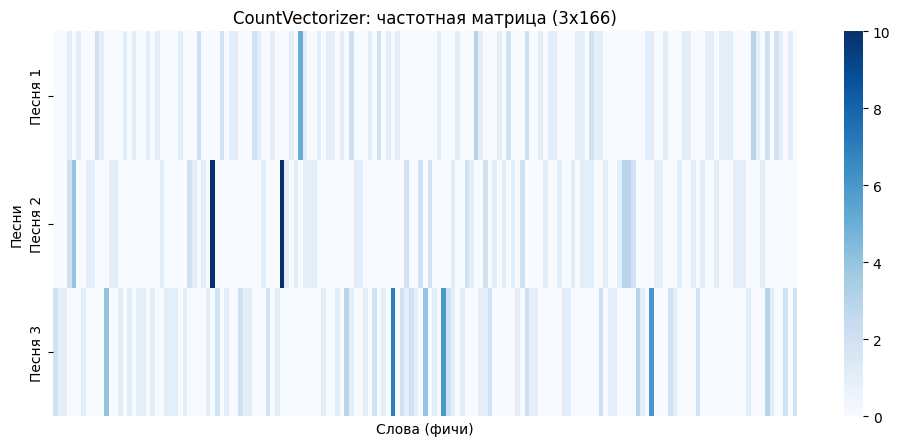

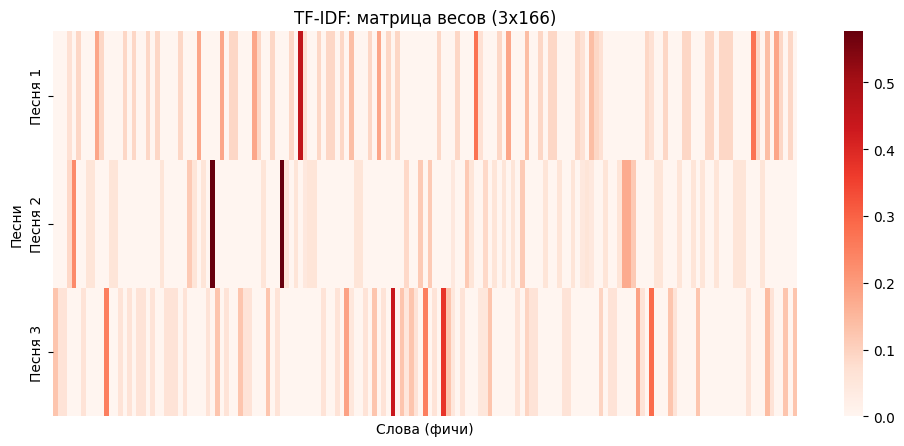

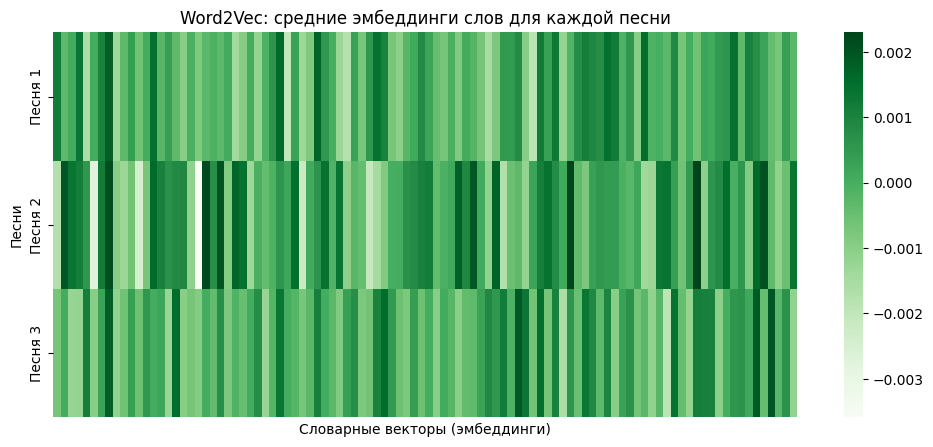

In [ ]:
def plot_heatmap(matrix, title, cmap):
    plt.figure(figsize=(12, 5))
    sns.heatmap(matrix.toarray(), cmap=cmap, xticklabels=False, yticklabels=["Песня 1", "Песня 2", "Песня 3"])
    plt.xlabel("Слова (фичи)")
    plt.ylabel("Песни")
    plt.title(title)
    plt.show()

# 1. Тепловая карта CountVectorizer
plot_heatmap(count_matrix, "CountVectorizer: частотная матрица (3x166)", "Blues")

# 2. Тепловая карта TF-IDF
plot_heatmap(tfidf_matrix, "TF-IDF: матрица весов (3x166)", "Reds")

# 3. Тепловая карта Word2Vec (матрица векторов)
# Для Word2Vec создадим матрицу, где строки - это песни, а столбцы - средний векторный вес слов в песне.
w2v_vectors = np.array([np.mean([w2v_model.wv[word] for word in song if word in w2v_model.wv.index_to_key], axis=0) for song in sentences])

plt.figure(figsize=(12, 5))
sns.heatmap(w2v_vectors, cmap="Greens", xticklabels=False, yticklabels=["Песня 1", "Песня 2", "Песня 3"])
plt.xlabel("Словарные векторы (эмбеддинги)")
plt.ylabel("Песни")
plt.title("Word2Vec: средние эмбеддинги слов для каждой песни")
plt.show()

1. **CountVectorizer** (первая тепловая карта, синий цвет). Показывает частоту слов в текстах. Видны слова, которые встречаются часто в отдельных песнях (тёмные полосы). Если слово часто встречается в каждой песне, оно будет переоценено.

2. **TF-IDF** (вторая тепловая карта, красный цвет). Общеупотребительные слова (например, встречающиеся во всех песнях) получают меньший вес. Видны слова, которые имеют наибольший вес в определённой песне.

3. **Word2Vec** (третья тепловая карта, зелёный цвет). Здесь отображены средние эмбеддинги слов в каждой песне. Видно, что распределение сильно сглажено, нет резких всплесков. Сохраняет семантику слов (например, "battlefield" и "war" могут получить похожие векторы).

Какой метод лучше? Зависит от цели:
- Если цель — найти, какие слова важны в конкретной песне → TF-IDF.
- Если цель — анализировать частотность слов (например, для построения статистики) → CountVectorizer.
- Если цель — сравнивать слова на основе их значений (синонимы, смысл) → Word2Vec.

# WordCloud

WordCloud (облако слов) — это визуальное представление текста, где часто встречающиеся слова отображаются в более крупном размере, а реже встречающиеся — в более мелком. Попробуем визуализировать наш текст

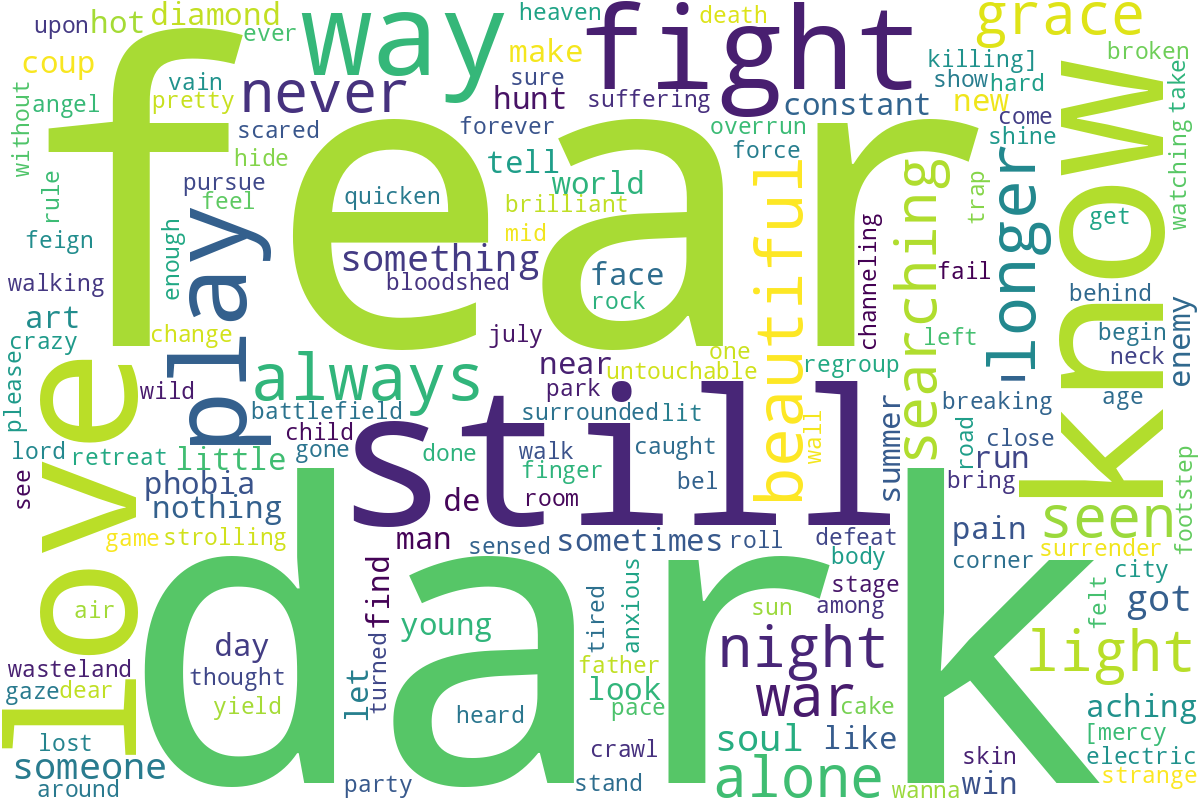

In [ ]:
from wordcloud import WordCloud
from collections import Counter

full_text = ''
for song in processed_lyrics_list:
    full_text = full_text + song + ' '

tokens = full_text.split(" ")
word_counts = Counter(tokens)

cloud = WordCloud(width=1200, height=800, background_color = '#FFFFFF')
cloud.generate_from_frequencies(word_counts)
cloud.to_image()

# Часть 2

Решите пожалуйста следующую задачу.
Данные IMDB Dataset.csv - Google Диск
Цель этого задания - использовать предварительно обученную модель BERT для
классификации тональности отзывов на фильмы.
1. Скачайте датасет отзывов на фильмы. Датасет содержит текст отзыва и бинарную
метку тональности (положительный/отрицательный).
2. Используйте библиотеку Hugging Face для загрузки предварительно обученной
модели BERT и токенизатора.
3. Подготовьте данные: используйте токенизатор BERT для преобразования текстовых
данных в формат, который можно подать на вход модели BERT.
4. Создайте классификатор на основе BERT: это может быть модель BERT с одним
линейным слоем для классификации на вершине.
5. Обучите классификатор на данных обучения и оцените его производительность на
данных для тестирования. Удачи

Откроем датасет, прочитаем данные

In [ ]:
import pandas as pd

file_path = "IMDB_Dataset.csv"
df = pd.read_csv(file_path)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'IMDB_Dataset.csv'

Переведем тональности отзывов на фильмы в бинарные целочисленные значения, разделим выборку на обучающую и тестировочную (обычно делят в пропорциях 80/20)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Кодирование меток
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Разделение на обучающую и тестовую выборки
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["review"].values, df["sentiment"].values, test_size=0.2, random_state=42
)

# Преобразование меток в numpy массив
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# Вывод размеров наборов данных
print("Train size / Test size")
len(train_texts), len(test_texts)

Загрузим токенизатор BERT и применим преобразование к текстам

In [ ]:
from transformers import BertTokenizer

# Загрузка токенизатора BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Токенизация текстов
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=512)

train_encodings.keys()

Создадим свой классификатор на основе предобученной модели: добавляем линейный слой, который будет выполнять классификацию. Добавим еще свой класс для датасета, для удобной загрузки в обучение.
И создадим свой пайпплан обучения:
1. Объявим свою функцию потерь (я беру BCELoss, измеряет двоичную перекрестную энтропию между истинными метками и предсказанными метками).
2. Оптимизатор, я беру AdamW потому что он более предпочтительнее в задачах дообучения.
3. Сам цикл обучения по эпохам.

Выведем график, по окончанию обучения, визуализирующем значения функции потерь и точность на этапе тренировки и валидации.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from transformers import AutoModel
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используем устройство: {device}")

# Загружаем предобученную модель BERT
bert_model = AutoModel.from_pretrained("bert-base-uncased")

# Создаём свой класс модели
class BertBinaryClassifier(nn.Module):
    def __init__(self, bert):
        super(BertBinaryClassifier, self).__init__()
        self.bert = bert
        hidden_size = bert.config.hidden_size
        self.classifier = nn.Linear(hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        logits = self.classifier(pooled_output)
        probs = torch.sigmoid(logits)
        return probs

model = BertBinaryClassifier(bert_model).to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {
            "input_ids": torch.tensor(self.encodings["input_ids"][idx], dtype=torch.long),
            "attention_mask": torch.tensor(self.encodings["attention_mask"][idx], dtype=torch.long)
        }
        label = torch.tensor(self.labels[idx], dtype=torch.float)
        return item, label

    def __len__(self):
        return len(self.labels)

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Списки для сохранения метрик по эпохам
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

epochs = 2
for epoch in range(epochs):
    ######################
    # Эпоха тренировки
    ######################
    model.train()
    running_loss = 0.0
    running_correct = 0
    running_samples = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        inputs, labels = batch
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask).squeeze()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # Накапливаем статистику
        running_loss += loss.item() * labels.size(0)
        preds = (outputs >= 0.5).float()
        running_correct += (preds == labels).sum().item()
        running_samples += labels.size(0)

    epoch_train_loss = running_loss / running_samples
    epoch_train_acc = running_correct / running_samples

    train_losses.append(epoch_train_loss)
    train_accuracies.append(epoch_train_acc)

    ######################
    # Эпоха валидации
    ######################
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    val_samples = 0

    with torch.no_grad():
        for batch in test_dataloader:
            inputs, labels = batch
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)
            labels = labels.to(device)

            outputs = model(input_ids, attention_mask=attention_mask).squeeze()
            loss = criterion(outputs, labels)


            val_running_loss += loss.item() * labels.size(0)
            preds = (outputs >= 0.5).float()
            val_running_correct += (preds == labels).sum().item()
            val_samples += labels.size(0)

    epoch_val_loss = val_running_loss / val_samples
    epoch_val_acc = val_running_correct / val_samples

    val_losses.append(epoch_val_loss)
    val_accuracies.append(epoch_val_acc)

    print(f"Эпоха {epoch+1}/{epochs}: "
          f"Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")

# Рисуем графики: Loss и Accuracy
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, label='Val Loss')
plt.title('Loss по эпохам')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_accuracies, label='Train Acc')
plt.plot(range(1, epochs+1), val_accuracies, label='Val Acc')
plt.title('Accuracy по эпохам')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Почти 94% точности на тестировочном наборе данных уже очень хороший результат, особенно если учитывать, что это всего лишь две эпохи обучения, лос на обучении уменьшается, значит всё хорошо и можно достичь еще большей точности при подборе параметров обучения и большем количестве эпох. Однако во имя экономии времени, дальшейшее обучение приостановлено.

### Сохраним веса модели

In [ ]:
torch.save(model.state_dict(), 'bert_binary_classifier.pth')